In this lab, you will build the Continuous Integration pipeline by setting up the steps under job in your workflow. Please ensure you complete setting up the workflow, before starting this lab.

You will add the following steps to the job in this lab:
- Check out the code
- Install dependencies
- Lint code with Flake8
- Run unit tests with nose

# Learning Objectives

After completing this lab, you will be able to:
* Explain components of a job in a GitHub Actions workflow
* Use predefined GitHub actions
* Run multiline inline code in a step
* Explore action logs in the GitHub UI

# Prerequisites

It is highly recommended that you complete the lab titled **'Using GitHub Actions - Setting up workflow'**.

If you have not finished the lab, please finish that before starting this lab.
* A basic understanding of YAML
* A GitHub account
* An intermediate-level knowledge of CLIs

## Pre-work

1. Generate a personal access token on [GitHub Settings](https://github.com/settings/tokens), if you already don't have one.
2. Open a terminal window by using the menu in the editor: **Terminal > New Terminal**.
3. Run the following command to authenticate with GitHub in the terminal with the personal access token.

```
gh auth login
```

**You will be taken through a guided experience as shown here:**
> * What account do you want to log into? **GitHub.com**
> * What is your preferred protocol for Git operations? **HTTPS**
> * Authenticate Git with your GitHub credentials.
> * How would you like to authenticate GitHub CLI? **Paste an authentication token.**
> * Paste your authentication token: ****************************************
> * You will be logged into GitHub as your account user.

4. Clone your copy of the forked [GitHub repository](https://github.com/ibm-developer-skills-network/wtecc-CICD_PracticeCode). This creates the `wtecc-CICD_PracticeCode` subdirectory under `/home/project` directory.

> If you already have cloned this repository under `/home/project`, you can skip this step.

5. If you don’t have `.github/workflows/workflow.yml` in `wtecc-CICD_PracticeCode` directory, create `workflow.yml` file in the `/home/project/wtecc-CICD_PracticeCode/.github/workflows` directory with the following code:

```
    name: CI workflow

    on:
      push:
        branches: [ "main" ]
      pull_request:
        branches: [ "main" ]

    jobs:
      build:
        runs-on: ubuntu-latest
        container: python:3.9-slim
```

# Step 1: Add the checkout Step

* You will now add your first step to the job.
* The first task is to check out the code from the repository.
* You will use the predefined `actions/checkout@v3` action to do this.
* You can learn more about this action on the GitHub page.

## Your Task

1. Add the `steps:` section at the end of the build job in the workflow file.
    ```
        steps:
    ```
2. Add the checkout step as the first step. Give it the `name:` Check out and call the action `actions/checkout@v3` by using the `uses:` keyword.

    ```
        steps:
          - name: {insert step name here}
            uses: {insert action name here}
    ```
**Double-check that your work matches the solution below.**

## Solution

Replace the `workflow.yml` file with the code snippet below. 

You can also copy relevant parts of the code. 

Be sure to indent properly:

```
name: CI workflow

on:
  push:
    branches: [ "main" ]
  pull_request:
    branches: [ "main" ]

jobs:
  build:
    runs-on: ubuntu-latest
    container: python:3.9-slim
    steps:
      - name: Checkout
        uses: actions/checkout@v3
```

# Step 2: Install Dependencies

Now that you have checked out the code, the next step is to install the dependencies. This application uses `pip`, the Python package manager, to install all the dependencies from the PyPI package. The pip command refers to the `requirements.txt` file for the list of dependencies. The `python:3.9-slim` container you are using already has the pip package manager installed.

The commands that you will use in this step are:
```
    python -m pip install --upgrade pip
    pip install -r requirements.txt
```

Now, look at each line to understand what it is doing:

```
    python -m pip install --upgrade pip
```

This command installs pip if it is not found on the GitHub runner or updates it to the latest version if it is already installed. It is always a good practice to make sure that you are using the latest version of pip to minimize installation problems.

```
    pip install -r requirements.txt
```

This command instructs `pip` to install any dependencies listed in the `requirements.txt` file. It is a best practice to place the names of dependent packages here.

***Note: If the above command gives any error, please execute the below command to install the dependencies***

```
    pip3 install -r requirements.txt
```

## Your Task

1. Add a new named step after the `checkout` step. Name this step `Install dependencies`.

    ```
      - name: {insert step name here}
    ```
2. Next, you want to run the commands to update the package manager `pip` and then install the dependencies. Since there are two commands, you can run these inline using the `run:` keyword with the pipe `|` operator.

    ```
      - name: Install dependencies
        run: |
          {insert code here}
    ```

**Double-check that your work matches the solution below.**

## Solution

Replace the `workflow.yml` file with the code snippet below. 

You can also copy relevant parts of the code. 

Be sure to indent properly:

```
name: CI workflow

on:
  push:
    branches: [ "main" ]
  pull_request:
    branches: [ "main" ]

jobs:
  build:
    runs-on: ubuntu-latest
    container: python:3.9-slim
    steps:
      - name: Checkout
        uses: actions/checkout@v3

      - name: Install dependencies
        run: |
          python -m pip install --upgrade pip
          pip install -r requirements.txt
```

# Step 3: Lint with flake8

It is always a good idea to add quality checks to your CI pipeline. This is especially true if you are working on an open source project with many different contributors. This makes sure that everyone who contributes is following the same style guidelines.

The next step is to use `flake8` to lint the source code. Linting is checking your code for syntactical and stylistic issues. Some examples are line spacing, using spaces or tabs for indentation, locating uninitialized or undefined variables, and missing parentheses. The flake8 library was installed as a dependency in the `requirements.txt` file.

The `flake8` commands take a few parameters. 

Now, take a look at the command and the parameters:

```
flake8 service --count --select=E9,F63,F7,F82 --show-source --statistics
```

This command will run `flake8` for the service folder of your repository. 

By adding the following options, you customize the linting process:
* **`--count`** : shows the count of all warnings and errors in the result of the command
* **`--select=E9,F63,F7,F82`** : limits the checks to syntax errors
* **`--show-source`** : adds the actual line number where the error/warning is found
* **`--statistics`** : shows the count of each type of error and warning in the result

```
flake8 service --count --max-complexity=10 --max-line-length=127 --statistics
```

Unlike the first command that checks for syntax errors only, the second command will run all the available checks on the service folder of your repository.

## Your Task

1. Add a new named step after the `Install dependencies` step. Call this step `Lint with flake8`.

    ```
        steps:
          - name: {insert step name here}
    ```
2. Next, you want to run the `flake8` commands to lint your code. The commands are explained in detail above.

    ```
        flake8 service --count --select=E9,F63,F7,F82 --show-source --statistics
        flake8 service --count --max-complexity=10 --max-line-length=127 --statistics
    ```

You can run inline commands using the `run` keyword with the pipe `|` operator.

```
    steps:
      - name: Lint with flake8
        run: |
          {insert first command here}
          {insert second command here}
```

## Solution

Replace the `workflow.yml` file with the code snippet below. 

You can also copy relevant parts of the code. 

Be sure to indent properly:

```
name: CI workflow

on:
  push:
    branches: main
  pull_request:
    branches: main

jobs:
  build:
    runs-on: ubuntu-latest
    container: python:3.9-slim
    steps:
      - name: Checkout
        uses: actions/checkout@v3

      - name: Install dependencies
        run: |
          python -m pip install --upgrade pip
          pip install -r requirements.txt

      - name: Lint with flake8
        run: |
          flake8 service --count --select=E9,F63,F7,F82 --show-source --statistics
          flake8 service --count --max-complexity=10 --max-line-length=127 --statistics
```

# Step 4: Test Code Coverage with nosetests

You will use `nose` in this step to unit test the source code. Nose is configured via the included setup.cfg file to automatically include the flags `–-with-spec` and `-–spec-color` so that red-green-refactor is meaningful. If you are in a command shell that supports colors, passing tests will be green and failing tests will be red.

Nose is also configured to automatically run the coverage tool, and you should see a percentage of coverage report at the end of your tests.

## Your Task

1. Add a new named step after the `Lint with flake8` step. Call this step `Run unit tests with nose`.

    ```
    steps:
      - name: {insert step name here}
    ```

2. Next, you want to run the nosetests command to test your code and report on code coverage.

    ```
    nosetests -v --with-spec --spec-color --with-coverage --cover-package=app
    ```

Since you are running a single command, you do not have to use the pipe `|` operator with `run`.
```
  - name: Run unit tests with nose
    run: {insert command here}
```

**Double-check that your work matches the solution below.**

## Solution

Replace the `workflow.yml` file with the code snippet below.

You can also copy relevant parts of the code.

Be sure to indent properly:

```
name: CI workflow

on:
  push:
    branches: [ "main" ]
  pull_request:
    branches: [ "main" ]

jobs:
  build:
    runs-on: ubuntu-latest
    container: python:3.9-slim
    steps:
      - name: Checkout
        uses: actions/checkout@v3

      - name: Install dependencies
        run: |
          python -m pip install --upgrade pip
          pip install -r requirements.txt

      - name: Lint with flake8
        run: |
          flake8 service --count --select=E9,F63,F7,F82 --show-source --statistics
          flake8 service --count --max-complexity=10 --max-line-length=127 --statistics

      - name: Run unit tests with nose
        run: nosetests -v --with-spec --spec-color --with-coverage --cover-package=app
```

# Step 5: Push Code to GitHub

To test the workflow and the CI pipeline, you need to commit the changes and push your branch back to the GitHub repository. As described earlier, each new push to the main branch should trigger the workflow.

## Your Task

1. Configure the Git account with your email and name using the `git config --global user.email` and `git config --global user.name` commands.

    ```
    git config --global user.email "you@example.com"
    git config --global user.name "Your Name"
    ```
2. The next step is to stage all the changes you made in the previous exercises and push them to your forked repo on GitHub.

    ```
    git add -A
    git commit -m "COMMIT MESSAGE"
    git push
    ```
Your output should look similar to the image below.

## Solution

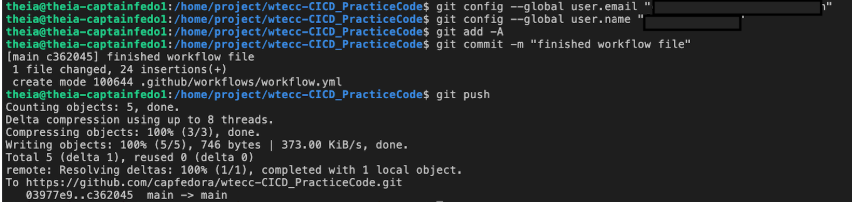

# Step 6: Run the Workflow

You can run the workflow now. Open the **Actions** tab in the forked repository in your GitHub account. Click the **CI workflow** action. Pushing changes in the previous step should have triggered a build action and it should be visible in the Actions tab.

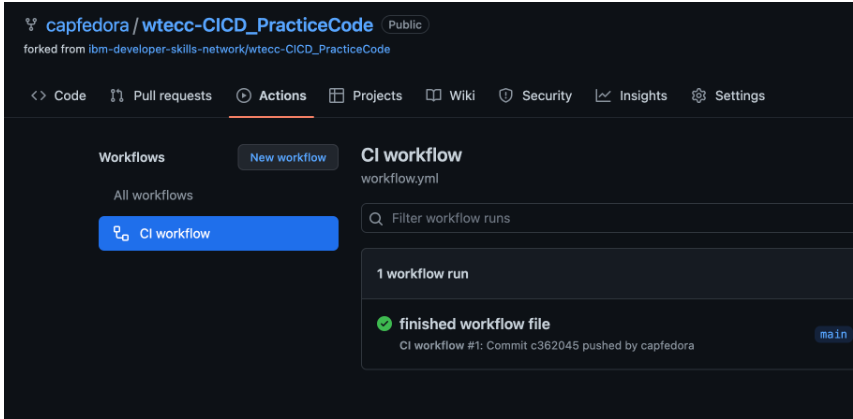

Click the most recent `workflow run` to open the details page. 

You should see your workflow completed successfully:

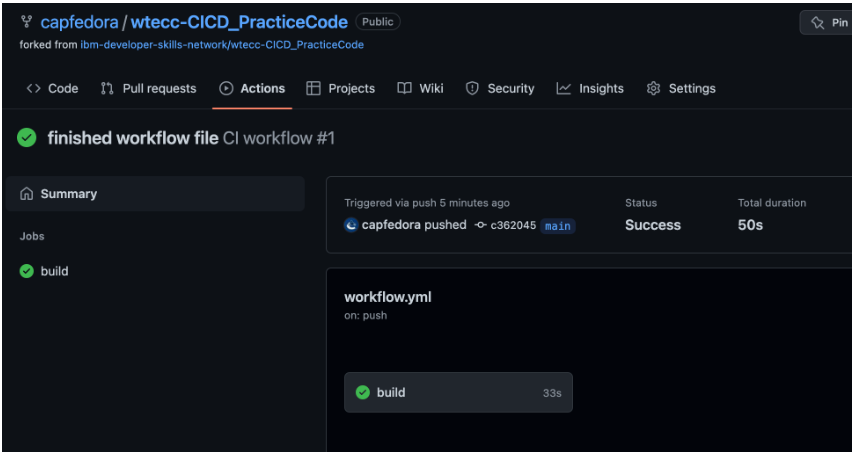

You can now click the `build` job to see the logs for each step:

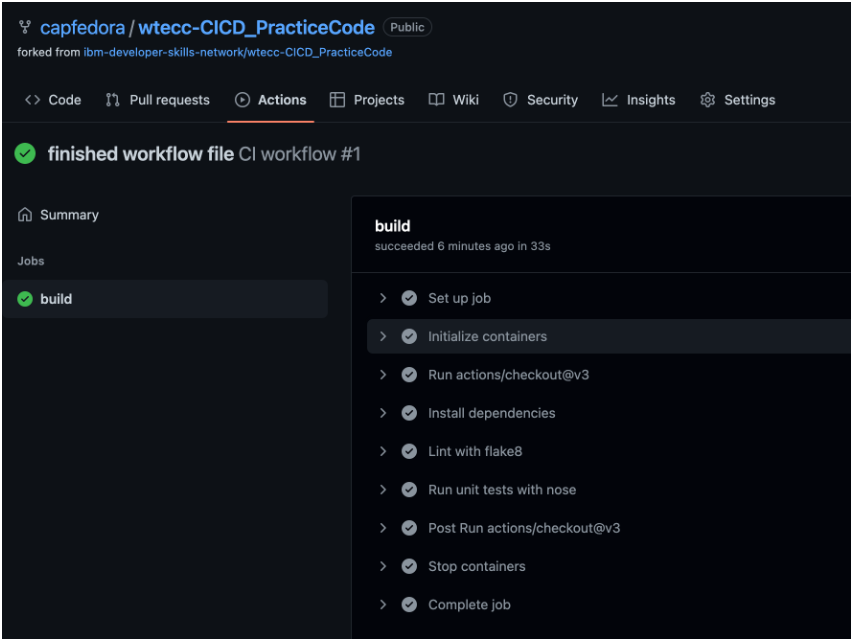

Spend some time here to expand each section:

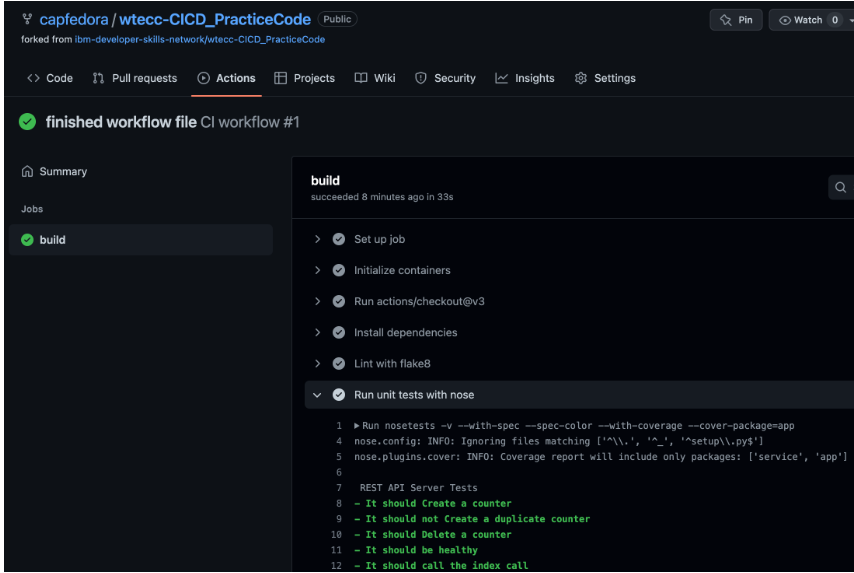

If the workflow completes, you will see the `Complete job` step at the end of the build job logs.

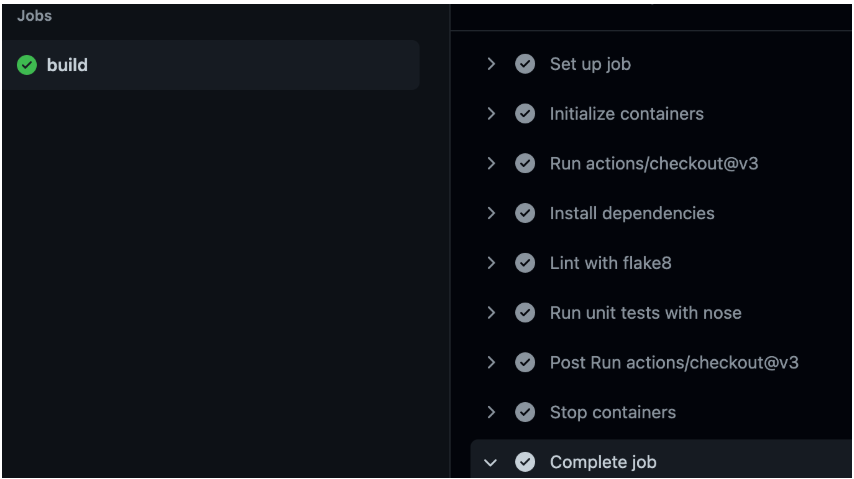

**Congratulations!**

You are now able to use **GitHub Actions to create workflows for the CI pipeline**.

In this lab, you added the steps to your **Continuous Integration pipeline** for your application. 

As a result, your application is automatically built and tested when you commit your code to the GitHub repository.



## Next Steps

Try to set up a GitHub action for your own project that checks out the code, runs unit tests, and performs linting on every push request to the default branch.